In [2]:
#plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


#modeling imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#pipeline modules
from acquire_titanic import get_titanic_data
from prepare_titanic import prep_titanic_data

In [7]:
df=prep_titanic_data(get_titanic_data())
df.dropna(inplace=True)
df.isnull().sum()

passenger_id       0
survived           0
pclass             0
sex                0
age                0
sibsp              0
parch              0
fare               0
embarked           0
class              0
embark_town        0
alone              0
embarked_encode    0
dtype: int64

In [8]:
X=df[['pclass','age','fare','sibsp','parch']]
y=df[['survived']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)
X_train.head()

,pclass,age,fare,sibsp,parch
60,3,22.0,7.2292,0,0
348,3,3.0,15.9000,1,1
606,3,30.0,7.8958,0,0
195,1,58.0,146.5208,0,0
56,2,21.0,10.5000,0,0


In [10]:
logit=LogisticRegression(C=1,class_weight={1:2},random_state=123,solver='saga')
logit.fit(X_train,y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=123, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.03183343 -0.00819677  0.01882492 -0.02030296  0.01317287]]
Intercept: 
 [0.00230414]


In [72]:
y_pred = logit.predict(X_train)
y_pred_proba=logit.predict_proba(X_train)

y_pred_proba

array([[5.34304998e-01, 4.65695002e-01],
       [4.56510268e-01, 5.43489732e-01],
       [5.47471919e-01, 4.52528081e-01],
       [9.50651937e-02, 9.04934806e-01],
       [5.08957338e-01, 4.91042662e-01],
       [5.25053234e-01, 4.74946766e-01],
       [5.33416889e-01, 4.66583111e-01],
       [2.19682650e-01, 7.80317350e-01],
       [4.38572097e-01, 5.61427903e-01],
       [4.56640941e-01, 5.43359059e-01],
       [3.48051572e-01, 6.51948428e-01],
       [5.25131161e-01, 4.74868839e-01],
       [3.31188469e-01, 6.68811531e-01],
       [4.42452981e-01, 5.57547019e-01],
       [4.44540490e-01, 5.55459510e-01],
       [3.30411042e-01, 6.69588958e-01],
       [3.85592032e-01, 6.14407968e-01],
       [4.08384689e-01, 5.91615311e-01],
       [5.47534732e-01, 4.52465268e-01],
       [1.04767585e-01, 8.95232415e-01],
       [2.36001657e-01, 7.63998343e-01],
       [5.15630352e-01, 4.84369648e-01],
       [4.79425903e-01, 5.20574097e-01],
       [5.33085161e-01, 4.66914839e-01],
       [5.304583

In [26]:
print('Accuracy of Logistic regression on training set: {:.2f}'.format(logit.score(X_train,y_train)))

Accuracy of Logistic regression on training set: 0.65


In [28]:
print(confusion_matrix(y_train,y_pred))

[[181 112]
 [ 64 142]]


In [48]:
c_mat=confusion_matrix(y_train,y_pred)

In [56]:
false_positive=c_mat[0,1]
true_negative=c_mat[0,0]
false_negative=c_mat[1,0]
true_positive=c_mat[1,1]

In [37]:
#compare this to what was produced from score method
accuracy=((true_negative+true_positive)/len(y_train))
accuracy

0.6472945891783567

In [58]:
#1-accuracy
classification_error=((false_positive+false_negative)/len(y_train))
classification_error

0.3527054108216433

In [60]:
#also called true positive rate
recall=true_positive/(true_positive+false_negative)
recall

0.6893203883495146

In [61]:
precision=true_positive/(true_positive+false_positive)
precision

0.5590551181102362

In [63]:
f1_score=(recall+precision)/2
f1_score

0.6241877532298754

In [65]:
false_positive_rate=false_positive/(false_positive+true_negative)
false_positive_rate

0.3822525597269625

In [88]:
cr=(classification_report(y_train,y_pred,output_dict=True))
#print(cr["0"])
#print(cr["1"])

{'precision': 0.7387755102040816, 'recall': 0.6177474402730375, 'f1-score': 0.6728624535315985, 'support': 293}
{'precision': 0.5590551181102362, 'recall': 0.6893203883495146, 'f1-score': 0.6173913043478261, 'support': 206}


In [69]:
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logit.score(X_test,y_test)))

Accuracy of Logistic Regression classifier on test set: 0.68


In [73]:
y_pred_proba=[i[1] for i in y_pred_proba]

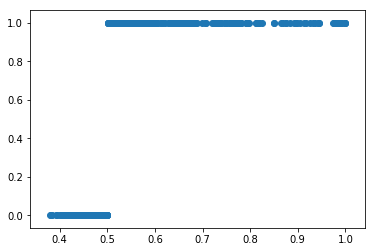

In [75]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(y_pred_proba,y_pred)
plt.show()

Let's us a decision tree to solve a classification problem

In [121]:
import pandas as pd
from pydataset import data
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydataset import data

In [93]:
df_iris=data('iris')
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [95]:
df_iris.columns=[col.lower().replace('.','_') for col in df_iris]

In [103]:
df_iris.head()
X=df_iris.drop(['species'],axis=1)
y=df_iris[['species']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=123)

In [107]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=123)

In [115]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [120]:
y_pred=clf.predict(X_train)
y_pred_proba=clf.predict_proba(X_train)
y_pred_proba
#y_pred

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.975, 0.025],
       [0.   , 0.975, 0.025],
       [1.   , 0.   , 0.   ],
       [0.

In [123]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train,y_train)))

Accuracy of Decision Tree classifier on training set: 0.98


In [124]:
confusion_matrix(y_train,y_pred)

array([[32,  0,  0],
       [ 0, 40,  0],
       [ 0,  2, 31]])

In [128]:
#Making the confusion matrix "pretty"
labels=sorted(y_train.species.unique())
pretty_cr=pd.DataFrame(confusion_matrix(y_train,y_pred),index=labels,columns=labels)